In [ ]:
! pip install transformers==4.0.1

Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 1.4MB 18.6MB/s eta 0:00:01
     |████████████████████████████████| 40kB 16.2MB/s eta 0:00:01
     |████████████████████████████████| 2.9MB 13.1MB/s eta 0:00:01


![文本相似度](https://img-blog.csdnimg.cn/136dde6917294a3aa8200b7b853d9133.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MTI4NzA2MA==,size_16,color_FFFFFF,t_70)

![train.json](https://img-blog.csdnimg.cn/img_convert/d0484fd918be5f239de10499fb07879c.png)

![test.json](https://img-blog.csdnimg.cn/img_convert/84e411156968837c4071bf0f22a76c2b.png)

In [ ]:
from tqdm import tqdm
import json
import pandas as pd
def read_data(path):
    sentence_a = []
    sentence_b = []
    labels = []
    with open(path, 'r', encoding='utf8') as f:
        for line in tqdm(f.readlines(), desc='Reading data'):
            line = json.loads(line)
            sentence_a.append(line['sentence1'])
            sentence_b.append(line['sentence2'])
            labels.append(int(line['label']))
    
    df = pd.DataFrame(zip(sentence_a, sentence_b, labels), columns=['text_a', 'text_b', 'labels'])
    return df

In [ ]:
train_df = read_data('data/data100821/train.json')

Reading data: 100%|██████████| 34334/34334 [00:00<00:00, 239315.65it/s]


In [ ]:
train_df.head(50)

,text_a,text_b,labels
0,蚂蚁借呗等额还款可以换成先息后本吗,借呗有先息到期还本吗,0
1,蚂蚁花呗说我违约一次,蚂蚁花呗违约行为是什么,0
2,帮我看一下本月花呗账单有没有结清,下月花呗账单,0
3,蚂蚁借呗多长时间综合评估一次,借呗得评估多久,0
4,我的花呗账单是***，还款怎么是***,我的花呗，月结出来说让我还***元，我自己算了一下详细名单我应该还***元,1
5,蚂蚁借呗的额度可以从申请不,蚂蚁借呗节假日可以借款吗,0
6,商家怎么开通花呗支付,为什么无法开通花呗,0
7,用花呗怎么买不了车票,我是问用蚂蚁花呗，为什么买不了火车票,0
8,如升级为网商贷用户而借呗的欠款怎么还,我借呗已还清，为什么升级不了网商贷,0
9,花呗不消费有没有年费,花呗不用就不会产生费用,0


In [ ]:
dev_df = read_data('data/data100821/dev.json')

Reading data: 100%|██████████| 4316/4316 [00:00<00:00, 257307.56it/s]


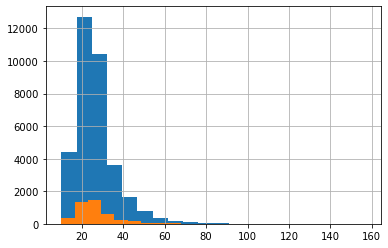

In [ ]:
# train_df text_a
(train_df.text_a.str.len() + train_df.text_b.str.len()).hist(bins=20);
(dev_df.text_a.str.len() + dev_df.text_b.str.len()).hist(bins=20);

In [ ]:
# 64能容纳99%的句子长度
(train_df.text_a.str.len() + train_df.text_b.str.len()).quantile(0.99)

64.0

In [ ]:
import torch
import random
import numpy as np
config = {
        'train_file_path': 'data/data100821/train.json',
        'dev_file_path': 'data/data100821/dev.json',
        'test_file_path': 'data/data100821/test.json',
        'embedding_file_path': 'data/data100821/sgns.weibo.word.bz2',
        'train_val_ratio': 0.1,
        'vocab_size': 30000,
        'batch_size': 64,
        'max_seq_len':64,
        'num_epochs': 1,
        'learning_rate': 1e-3,
        'device': 'cpu',
        'logging_step': 200,
        'seed': 2021
    } 

if torch.cuda.is_available():
    config['device'] = 'cuda'

def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    return seed

seed_everything(config['seed'])

2021

In [ ]:
# 处理文件，生层词表放回关于train_df[train.json + dev.json],test_df
from collections import Counter
import jieba
import bz2
def preprocess(config):
    def convert2df(file_path, dataset='train'):
        sentence_a = []
        sentence_b = []
        labels = []
        with open(file_path, 'r', encoding='utf8') as f:
            for line in tqdm(f.readlines(), desc=f'Reading {dataset} data'):
                line = json.loads(line)
                sentence_a.append(line['sentence1'])
                sentence_b.append(line['sentence2'])
                if dataset != 'test':
                    labels.append(int(line['label']))
                else:
                    labels.append(0)

                tokens = list(jieba.cut(sentence_a[-1])) + list(jieba.cut(sentence_b[-1]))
                token_counter.update(tokens)
        df = pd.DataFrame(zip(sentence_a, sentence_b, labels), columns=['text_a', 'text_b', 'labels'])
        return df
    
    token_counter = Counter()

    train_df = convert2df(config['train_file_path'], 'train')
    dev_df = convert2df(config['dev_file_path'], 'dev')
    test_df = convert2df(config['test_file_path'], 'test')

    train_df = train_df.append(dev_df)
    vocab = set(token for token, _ in token_counter.most_common(config['vocab_size']))
    return train_df, test_df, vocab

In [ ]:
train_df, test_df, vocab = preprocess(config)

Reading train data:   0%|          | 0/34334 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.863 seconds.
Prefix dict has been built successfully.
Reading test data: 100%|██████████| 3861/3861 [00:00<00:00, 6193.95it/s]


In [ ]:
vocab

 ...}

In [ ]:
# TextCNN 词表对应成向量
def get_embedding(vocab, embedding_file_path):
    print('processing embedding file ...')

    token2embedding = {}

    with bz2.open(embedding_file_path) as f:

        token_vectors = f.readlines()
        meta_info = token_vectors[0].split()
        print(f'{meta_info[0]} tokens in embedding file in total, vector size is {meta_info[-1]}')

        for line in tqdm(token_vectors[1:]):
            line = line.split()
            token = line[0].decode('utf8')

            vector = line[1:]
            if token in vocab:
                token2embedding[token] = [float(num) for num in vector]

    token2idx = {token: idx for idx, token in enumerate(token2embedding.keys(), 4)}
    UNK, PAD, BOS, EOS = '<unk>', '<pad>', '<bos>', '<eos>'
    token2idx[PAD] = 0
    token2idx[UNK] = 1
    token2idx[BOS] = 2
    token2idx[EOS] = 3
    idx2token = {idx: token for token, idx in token2idx.items()}
    idx2embedding = {token2idx[token]: embedding for token, embedding in token2embedding.items()}
    idx2embedding[0] = [.0] * int(meta_info[-1])
    idx2embedding[1] = [.0] * int(meta_info[-1])
    idx2embedding[2] = np.random.random(int(meta_info[-1])).tolist()
    idx2embedding[3] = np.random.random(int(meta_info[-1])).tolist()
    emb_mat = [idx2embedding[idx] for idx in range(len(idx2embedding))]

    return torch.tensor(emb_mat, dtype=torch.float), token2idx, len(vocab) + 4

In [ ]:
embedding_matrix, token2idx, config['vocab_size'] = get_embedding(vocab, config['embedding_file_path'])

processing embedding file ...


  2%|▏         | 4083/195202 [00:00<00:14, 13060.62it/s]

b'195202' tokens in embedding file in total, vector size is b'300'


  7%|▋         | 13583/195202 [00:00<00:08, 20754.04it/s]100%|██████████| 195202/195202 [00:02<00:00, 70533.61it/s]


In [ ]:
from collections import defaultdict
def tokenizer(sent, token2id):
    # .get() 找到返回 token的id, 没找到就返回 1 1->UNK
    ids = [token2id.get(token, 1) for token in jieba.cut(sent)]
    return ids

In [ ]:
def read_data(data_df, train_val_ratio, token2id, mode='train'):
    if mode == 'train':
        X_train, y_train = defaultdict(list), []
        X_val, y_val = defaultdict(list), []
        num_val = int(len(data_df) * train_val_ratio)
    else:
        X_test, y_test = defaultdict(list), []

    for i, row in tqdm(data_df.iterrows(), desc=f'Preprocessing {mode} data', total=len(data_df)):
        # -------------  new ---------------------------#
        text_left = row[0]
        text_right = row[1]
        label = row[2]

        inputs_a = tokenizer(text_left, token2id=token2idx)
        inputs_b = tokenizer(text_right, token2id=token2idx)

        if mode == 'train':
            if i<num_val:
                X_val['text_left'].append(inputs_a)
                X_val['text_right'].append(inputs_b)
                y_val.append(label)
            else:
                X_train['text_left'].append(inputs_a)
                X_train['text_right'].append(inputs_b)
                y_train.append(label)  

        else:
            X_test['text_left'].append(inputs_a)
            X_test['text_right'].append(inputs_b)
            y_test.append(label)             

        # -------------  new ---------------------------#

    if mode == 'train':
        label2id = {label: i for i, label in enumerate(np.unique(y_train))}
        id2label = {i: label for label, i in label2id.items()}
        y_train = torch.tensor([label2id[label] for label in y_train], dtype=torch.long)
        y_val = torch.tensor([label2id[label] for label in y_val], dtype=torch.long)
        return X_train, y_train, X_val, y_val, label2id, id2label
    else:
        y_test = torch.tensor(y_test, dtype=torch.long)
        return X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, label2id, id2label = read_data(train_df, config['train_val_ratio'], token2idx, mode='train')
X_test, y_test = read_data(test_df, config['train_val_ratio'], token2idx, mode='test')

Preprocessing test data: 100%|██████████| 3861/3861 [00:01<00:00, 3764.93it/s]


In [ ]:
from torch.utils.data import Dataset
class AFQMCDataset(Dataset):

    def __init__(self, x, y):
        super(AFQMCDataset, self).__init__()
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        # ------------ new -----------------#
        data = (self.x['text_left'][idx], 
                self.x['text_right'][idx], 
                self.y[idx])
        return data
        # ------------ new -----------------#

    def __len__(self):
        return self.y.size(0)

```
TextCNN中collete_fn函数
def collete_fn(examples):
    input_ids_list = []
    labels =[]
    for example in examples:
        input_ids_list.append(example['input_ids'])
        labels.append(example['label'])
    
    # 对齐操作 -- 找到 input_ids_list 中 最长的 句子， 执行短句子补齐
    # 1. 找到 input_ids_list 中 最长的 句子
    max_length = max(len(input_ids) for input_ids in input_ids_list) 
    # 2. 定义一个 input_ids_tensor, 我们要把 每个 input_ids 放入 tensor 中
    input_ids_tensor = torch.zeros((len(labels), max_length), dtype=torch.long)
    for i, input_ids in enumerate(input_ids_list):
        # 得到当前句子的长度
        seq_len = len(input_ids)
        # 第i个句子，填充 seq_len 这么长
        input_ids_tensor[i, :seq_len] = torch.tensor(input_ids, dtype=torch.long)
    
    return {
        'input_ids' : input_ids_tensor,
        'labels' : torch.tensor(labels, dtype=torch.long)
    }
```

In [ ]:
# 假设 传入 Collator一共两条数据
# 每条数据 data = (sentence1, sentence2, label])
datas = [([1,2,3],[4,5,6],1),([777,888,999],[321,543,654],0)]
print(*datas)
print(zip(*datas))
print(list(zip(*datas)))

([1, 2, 3], [4, 5, 6], 1) ([777, 888, 999], [321, 543, 654], 0)
[([1, 2, 3], [777, 888, 999]), ([4, 5, 6], [321, 543, 654]), (1, 0)]


In [ ]:
# __call__
class MyClass():
    def __call__(self):
        print('__call__方法被调用')
        return 'done'

In [ ]:
obj = MyClass()
res = obj()

__call__方法被调用


In [ ]:
# 从 AFQMCDataset 输出的 data  = (sentence1, sentence2, label])
# 1. 将元组中属于sentence1的放在一起，属于sentence2的放在一起，属于label的放在一起
# 2. 对齐操作，找到sentence1, sentence2,最长的句子，执行短句子补齐
# 3. 定义一个tensor，把数据放里面

class Collator:
    def __init__(self, max_seq_len):
        self.max_seq_len = max_seq_len

    def get_max_seq_len(self, ids_list):
        cur_max_seq_len = max(len(input_id) for input_id in ids_list)
        max_seq_len = min(self.max_seq_len, cur_max_seq_len)
        return max_seq_len
    
    @staticmethod
    def pad_and_truncate(text_ids_list, max_seq_len):
        input_ids = torch.zeros((len(text_ids_list), max_seq_len), dtype=torch.long)
        for i, text_ids in enumerate(text_ids_list):
            seq_len = min(len(text_ids), max_seq_len)
            input_ids[i, :seq_len] = torch.tensor(text_ids[:seq_len], dtype=torch.long)
        
        return input_ids

    
    def __call__(self, examples):
        # 1. 将元组中属于sentence1的放在一起，属于sentence2的放在一起，属于label的放在一起
        text_ids_left_list, text_ids_right_list, labels_list = list(zip(*examples))

        # 2.1 找到 text_ids_left_list, text_ids_right_list 最长的句子长度
        max_text_left_length = self.get_max_seq_len(text_ids_left_list)
        max_text_right_length = self.get_max_seq_len(text_ids_right_list)

        # 2.2 执行短暂句子补齐, 3.定义一个tensor，把数据放里面
        text_left_ids = self.pad_and_truncate(text_ids_left_list, max_text_left_length)
        text_right_ids = self.pad_and_truncate(text_ids_right_list, max_text_right_length)
        labels = torch.tensor(labels_list, dtype=torch.long)
        
        data_list = [text_left_ids, text_right_ids, labels]
        return data_list

In [ ]:
from torch.utils.data import DataLoader
def build_dataloader(train_df, test_df, config, vocab):
    X_train, y_train, X_val, y_val, label2id, id2label = read_data(train_df, config['train_val_ratio'], vocab, mode='train')
    X_test, y_test = read_data(test_df, config['train_val_ratio'], vocab, mode='test')

    train_dataset = AFQMCDataset(X_train, y_train)
    val_dataset = AFQMCDataset(X_val, y_val)
    test_dataset = AFQMCDataset(X_test, y_test)
    
    # -----------------new -----------------------#
    collate_fn = Collator(config['max_seq_len'])
    # -----------------new -----------------------#

    train_dataloader = DataLoader(dataset=train_dataset, batch_size=config['batch_size'],
                                  num_workers=4, shuffle=True, collate_fn=collate_fn)
    val_dataloader = DataLoader(dataset=val_dataset, batch_size=config['batch_size'],
                                num_workers=4, shuffle=False, collate_fn=collate_fn)
    test_dataloader = DataLoader(dataset=test_dataset, batch_size=config['batch_size'],
                                 num_workers=4, shuffle=False, collate_fn=collate_fn)

    return id2label, test_dataloader, train_dataloader, val_dataloader

In [79]:
id2label, test_dataloader, train_dataloader, val_dataloader = build_dataloader(train_df, test_df, config, token2idx)

Preprocessing test data: 100%|██████████| 3861/3861 [00:01<00:00, 3676.12it/s]


In [ ]:
for i in train_dataloader:
    print(i)
    break

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
def evaluation(config, model, val_dataloader):
    model.eval()
    preds = []
    labels = []
    val_loss = 0.
    val_iterator = tqdm(val_dataloader, desc='Evaluation', total=len(val_dataloader))
    with torch.no_grad():
        for batch in val_iterator:
            # batch [([sent_left_id1],[sent_left_id1]..),([sent_right_id2],[sent_right_id2]..),([label],[label]..)]
            # -----------new ----------------#
            labels.append(batch[-1])
            batch = [item.to(config['device']) for item in batch]
            loss, logits = model(batch)[:2]
            # -----------new ----------------#

            val_loss += loss.item()
            # 返回逻辑值最大的位置，要么0，要么1
            preds.append(logits.argmax(dim=-1).detach().cpu())

    avg_val_loss = val_loss / len(val_dataloader)
    labels = torch.cat(labels, dim=0).numpy()
    preds = torch.cat(preds, dim=0).numpy()
    f1 = f1_score(labels, preds, average='macro')
    # -----------new ----------------#
    acc = accuracy_score(labels, preds)
    # -----------new ----------------#
    return avg_val_loss, f1, acc

In [ ]:
# TextCNN 改写
from tqdm import trange
from transformers import AdamW

def train(model, config, id2label, train_dataloader, val_dataloader):
    optimizer = AdamW(model.parameters(), lr=config['learning_rate'])
    model.to(config['device'])
    epoch_iterator = trange(config['num_epochs'])

    global_steps = 0
    train_loss = 0.
    logging_loss = 0.

    for epoch in epoch_iterator:

        train_iterator = tqdm(train_dataloader, desc='Training', total=len(train_dataloader))
        model.train()
        for batch in train_iterator:
            # -----------new ----------------#
            batch = [item.to(config['device']) for item in batch]
            loss = model(batch)[0]
            # -----------new ----------------#

            model.zero_grad()
            loss.backward()
            
            optimizer.step()

            train_loss += loss.item()
            global_steps += 1

            if global_steps % config['logging_step'] == 0:
                print_train_loss = (train_loss - logging_loss) / config['logging_step']
                logging_loss = train_loss

                # -----------new ----------------#
                avg_val_loss, f1, acc = evaluation(config, model, val_dataloader)
                # -----------new ----------------#

                print_log = f'>>> training loss: {print_train_loss:.4f}, valid loss: {avg_val_loss:.4f}, ' \
                            f'valid f1 score: {f1:.4f}, valid acc: {acc:.4f}'
                print(print_log)
                model.train()

    return model

In [ ]:
def predict(config, id2label, model, test_dataloader):
    test_iterator = tqdm(test_dataloader, desc='Predicting', total=len(test_dataloader))
    model.eval()
    test_preds = []
    with torch.no_grad():
        for batch in test_iterator:
            batch = [item.to(config['device']) for item in batch]
            logits = model(batch)[1]
            test_preds.append(logits.argmax(dim=-1).detach().cpu())
    test_preds = torch.cat(test_preds, dim=0).numpy()
    test_preds = [id2label[id_] for id_ in test_preds]
    return test_preds

In [ ]:
from time import sleep
for i in tqdm(range(60*15), desc="现在是休息时间，看录播的同学可以跳过哦～"):
    sleep(1)

现在是休息时间，看录播的同学可以跳过哦～: 100%|██████████| 900/900 [15:02<00:00,  1.00s/it]


## 预备知识

In [ ]:
# 定义一个 [2,3,4] -> [batch_size, seq_len, embedding_dim]  一个batch有两个句子，每个句子3个词，每个词的维度为4
a = torch.tensor([[[5., 5., 5., 5.],[6., 6., 6., 6.],[7., 7., 7., 7.]], [[1., 1., 1., 1.],[2., 2., 2., 2.],[3., 3., 3., 3.]]])
print(a)
print(a.size())

tensor([[[5., 5., 5., 5.],
         [6., 6., 6., 6.],
         [7., 7., 7., 7.]],

        [[1., 1., 1., 1.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.]]])
torch.Size([2, 3, 4])


In [ ]:
# [2, 1, 4]
ones = torch.ByteTensor([[[1, 1, 0, 0]],[[0, 1, 1, 0]]])
print(ones.size())

torch.Size([2, 1, 4])


In [ ]:
# 相当于将词向量 某些维度 清0
print(ones * a) # ones. [2,1,4] -> [2,3,4] 
print((ones * a).size())

tensor([[[5., 5., 0., 0.],
         [6., 6., 0., 0.],
         [7., 7., 0., 0.]],

        [[0., 1., 1., 0.],
         [0., 2., 2., 0.],
         [0., 3., 3., 0.]]])
torch.Size([2, 3, 4])


### masked_fill

In [ ]:
# [2, 3, 1]
mask = torch.ByteTensor([[[1],[1],[0]],[[0],[1],[1]]])
print(mask.size())

torch.Size([2, 3, 1])


In [ ]:
# 定义一个 [2,3,4] -> [batch_size, seq_len, embedding_dim]  一个batch有两个句子，每个句子3个词，每个词的维度为4
a = torch.tensor([[[5., 5., 5., 5.],[6., 6., 6., 6.],[7., 7., 7., 7.]], [[1., 1., 1., 1.],[2., 2., 2., 2.],[3., 3., 3., 3.]]])
print(a)
print(a.size())

tensor([[[5., 5., 5., 5.],
         [6., 6., 6., 6.],
         [7., 7., 7., 7.]],

        [[1., 1., 1., 1.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.]]])
torch.Size([2, 3, 4])


In [ ]:
# a [2,3,4] mask[2,3,1]
#是将 mask 中 为1 的 元素所在的索引，在 a 中 相同索引处替换为value
# 把某个词向量给mask
b = a.masked_fill(mask, value=torch.tensor(-1e7))
print(b)
print(b.size())

tensor([[[-1.0000e+07, -1.0000e+07, -1.0000e+07, -1.0000e+07],
         [-1.0000e+07, -1.0000e+07, -1.0000e+07, -1.0000e+07],
         [ 7.0000e+00,  7.0000e+00,  7.0000e+00,  7.0000e+00]],

        [[ 1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00],
         [-1.0000e+07, -1.0000e+07, -1.0000e+07, -1.0000e+07],
         [-1.0000e+07, -1.0000e+07, -1.0000e+07, -1.0000e+07]]])
torch.Size([2, 3, 4])


/opt/conda/conda-bld/pytorch_1579022071458/work/aten/src/ATen/native/LegacyDefinitions.cpp:41: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


In [ ]:
# [2, 1, 4]
ones = torch.ByteTensor([[[1, 1, 0, 0]],[[0, 1, 1, 0]]])
print(ones.size())

torch.Size([2, 1, 4])


In [ ]:
mask = ones # [2, 1, 4]
b = a.masked_fill(mask, value=torch.tensor(-1e7))
print(b)
print(b.size())

tensor([[[-1.0000e+07, -1.0000e+07,  5.0000e+00,  5.0000e+00],
         [-1.0000e+07, -1.0000e+07,  6.0000e+00,  6.0000e+00],
         [-1.0000e+07, -1.0000e+07,  7.0000e+00,  7.0000e+00]],

        [[ 1.0000e+00, -1.0000e+07, -1.0000e+07,  1.0000e+00],
         [ 2.0000e+00, -1.0000e+07, -1.0000e+07,  2.0000e+00],
         [ 3.0000e+00, -1.0000e+07, -1.0000e+07,  3.0000e+00]]])
torch.Size([2, 3, 4])


/opt/conda/conda-bld/pytorch_1579022071458/work/aten/src/ATen/native/LegacyDefinitions.cpp:41: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


## ESIM模型 

![ESIM](https://img-blog.csdnimg.cn/img_convert/1adb67ec46e87da23fa042f298ff88bb.png)

![ESIM2](https://img-blog.csdnimg.cn/img_convert/6cfe48bd15e9616c0d92eaeebfa50e7b.png)

![pytorch LSTM](https://img-blog.csdnimg.cn/5697d3a5bfec44039e4c1b407c4ec924.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MTI4NzA2MA==,size_16,color_FFFFFF,t_70)

![stackRNN](https://img-blog.csdnimg.cn/02b1b24b629c4defabb888776f9d3f57.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MTI4NzA2MA==,size_16,color_FFFFFF,t_70)

![Local Inference Modeling](https://img-blog.csdnimg.cn/c8afbd13e0da49a080fd8207e31eac8c.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MTI4NzA2MA==,size_16,color_FFFFFF,t_70)

![Local inference collected over sequences](https://img-blog.csdnimg.cn/759a1006a9354deeabdb8e0a7bc5f20a.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MTI4NzA2MA==,size_16,color_FFFFFF,t_70)

![Local inference 3](https://img-blog.csdnimg.cn/176f587346994ceaa2d6e0d3393a69b4.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MTI4NzA2MA==,size_16,color_FFFFFF,t_70)

![The composition layer](https://img-blog.csdnimg.cn/bb58ab8d53454eb2aaf450b5378bcb74.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MTI4NzA2MA==,size_16,color_FFFFFF,t_70)

![Pooling](https://img-blog.csdnimg.cn/66a661431da8440d9cd0efdb3aeac523.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MTI4NzA2MA==,size_16,color_FFFFFF,t_70)

![all of gongshi](https://img-blog.csdnimg.cn/652165f9f0584ac683c0df8d412514be.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MTI4NzA2MA==,size_16,color_FFFFFF,t_70)

In [80]:
model_config = {
        'embedding': embedding_matrix,  # torch.Size([5251, 300])
        'freeze_emb': True,
        'hidden_size': 256,
        'dropout': 0.3,
        'num_layers': 2,
        'concat_layers': True,
        'rnn_type': 'lstm',
        'num_labels': len(id2label)
    }

In [81]:
import torch.nn as nn
class RNNDropout(nn.Dropout):
    # 将词向量 某些维度 清0
    # sequences_batch [B, L, D]
    def forward(self, sequences_batch):
        # ones [B, D]
        ones = sequences_batch.data.new_ones(sequences_batch.shape[0], sequences_batch.shape[-1])

        # 随机 mask ones
        # dropout_mask [B, D]
        dropout_mask = nn.functional.dropout(ones, self.p, self.training, inplace=False)
       
        return dropout_mask.unsqueeze(1) * sequences_batch

In [82]:
import torch.nn.functional as F
class StackedBRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers,
                 dropout_rate=0, dropout_output=False, rnn_type=nn.LSTM, 
                 concat_layers=False):
        super().__init__()
        self.dropout_output = dropout_output
        self.dropout_rate = dropout_rate
        self.num_layers = num_layers
        self.concat_layers = concat_layers
        self.rnns = nn.ModuleList()
        # 共有两层LSTM
        for i in range(num_layers):
            input_size = input_size if i == 0 else 2*hidden_size
            self.rnns.append(rnn_type(input_size, hidden_size, num_layers=1, bidirectional=True))
    
    def forward(self, x):
        # x (B, L, D) -> (L, B, D)
        x = x.transpose(0, 1)

        outputs = [x]
        for i in range(self.num_layers):
            rnn_input = outputs[-1]

            if self.dropout_rate > 0:
                rnn_input = F.dropout(rnn_input, p=self.dropout_rate, training=self.training)
            
            # self.rnn[i](rnn_input) (output, (h_n, c_n))
            rnn_output = self.rnns[i](rnn_input)[0]
            outputs.append(rnn_output)
        
        # outputs [x, output0, output1]
        if self.concat_layers:
            output = torch.cat(outputs[1:], 2)
        else:
            output = outputs[-1]
        
        # output (L, B, D) -> (B, L, D)
        output = output.transpose(0, 1)

        if self.dropout_output and self.dropout_rate > 0:
            output = F.dropout(output, p=self.dropout_rate, training=self.training)
        
        # 进行 transpose之后，tensor在内存中不连续， contiguous将output内存连续
        return output.contiguous()

In [83]:
class BidirectionalAttention(nn.Module):
    def __init__(self):
        super().__init__()
        
        # v1 [B, L, H]
        # v1_mask [B, L]
        # v2 [B, R, H]
        # v2_mask [B, R]
    def forward(self, v1, v1_mask, v2, v2_mask):
        # v2:a v1:b 

        # 1.计算矩阵相似度
        # similarity_matrix [B, L, R]
        similarity_matrix = v1.bmm(v2.transpose(2, 1).contiguous())

        # 2.计算attention时没有必要计算pad=0, 要进行mask操作 3.进行softmax
        # 将similarity_matrix v1中pad对应的权重给mask
        # [B, L, R]
        v2_v1_attn = F.softmax(
            similarity_matrix.masked_fill(
                v1_mask.unsqueeze(2), -1e7), dim=1)

        # 将similarity_matrix v2中pad对应的权重给mask
        # [B, L, R]
        v1_v2_attn = F.softmax(
            similarity_matrix.masked_fill(
                v2_mask.unsqueeze(1), -1e7),dim=2)

        # 4.计算attention
        # [B, L, R] @ [B, R, H] 
        # 句子a 对b的影响 [B, L, H]
        # attented_v1 [B, L, H]
        attented_v1 = v1_v2_attn.bmm(v2)

        # 句子b 对a的影响 
        # v2_v1_attn [B, L, R] -> [B, R, L] @[B, L, H] -> [B, R, H]
        # attented_v2 [B, R, H]
        attented_v2 = v2_v1_attn.transpose(1,2).bmm(v1)

        # attented_v1 将v1对应的pad填充为0
        # attented_v2 将v2对应的pad填充为0
        attented_v1.masked_fill(v1_mask.unsqueeze(2), 0)
        attented_v2.masked_fill(v2_mask.unsqueeze(2), 0)
        return attented_v1, attented_v2


In [84]:
class ESIM(nn.Module):
    
    def __init__(self, config):
        super().__init__()

        # -----------------------   input encoding  ---------------------#
        rnn_mapping = {'lstm': nn.LSTM, 'gru': nn.GRU}
        self.embedding = nn.Embedding.from_pretrained(config['embedding'], freeze=config['freeze_emb'])

        self.rnn_dropout = RNNDropout(p=config['dropout'])
        rnn_size = config['hidden_size']

        if config['concat_layers']:
            rnn_size //= config['num_layers']

        self.input_encoding = StackedBRNN(input_size=config['embedding'].size(1),
                                          hidden_size=rnn_size // 2,
                                          num_layers=config['num_layers'],
                                          rnn_type=rnn_mapping[config['rnn_type']],
                                          concat_layers=config['concat_layers'])

        # -----------------------   input encoding  ---------------------#

        # -----------------------   Local inference collected over sequences  ---------------------#
        self.attention = BidirectionalAttention()
        # -----------------------   Local inference collected over sequences  ---------------------#


        # -----------------------   the compositon layer  ---------------------#
        self.projection = nn.Sequential(
            nn.Linear(4 * config['hidden_size'], config['hidden_size']),
            nn.ReLU()
        )


        self.composition = StackedBRNN(input_size=config['hidden_size'],
                                      hidden_size=rnn_size // 2,
                                      num_layers=config['num_layers'],
                                      rnn_type=rnn_mapping[config['rnn_type']],
                                      concat_layers=config['concat_layers'])


        # -----------------------   the compositon layer  ---------------------#


        self.classification = nn.Sequential(
            nn.Dropout(p=config['dropout']),
            nn.Linear(4 * config['hidden_size'], config['hidden_size']),
            nn.Tanh(),
            nn.Dropout(p=config['dropout']))
            
        self.out = nn.Linear(config['hidden_size'], config['num_labels'])

    def forward(self, inputs):
        # inputs: [sentence1_tensor, sentence2_tensor, labels_tensor]
        # B: batch_size
        # L = 'inputs left'  sequence length
        # R = 'inputs right'  sequence length
        # D = embedding size
        # H = hidden size

        # -----------------------   input encoding  ---------------------#
        # query sentence1_tensor
        # doc sentence2_tensor
   
        # query [B, L]
        # doc [B, R] 
        query, doc = inputs[0].long(), inputs[1].long()
        
        # 判断 query，doc中的每一个数是不是0， 是1则表示该位置是pad
        # query：[2,3,4,5,0,0,0] -> query_mask：[0,0,0,0,1,1,1]
        # query_mask [B, L]
        # doc_mask [B, R]
        query_mask = (query == 0)
        doc_mask = (doc == 0)
        
        # query [B, L, D]
        # doc [B, R, D]
        query = self.embedding(query)
        doc = self.embedding(doc)
        
        # query [B, L, D]
        # doc [B, R, D]
        query = self.rnn_dropout(query)
        doc = self.rnn_dropout(doc)
        
        # query [B, L, H]
        # doc [B, R, H]
        query = self.input_encoding(query)
        doc = self.input_encoding(doc)
        # -----------------------   input encoding  ---------------------#

        # 1.计算矩阵相似度
        # 2.计算attention时没有必要计算pad=0, 要进行mask操作
        # 3.进行softmax
        # 4.计算attention

        # -----------------------   Local inference collected over sequences  ---------------------#
        # query [B, L, H]
        # query_mask [B, L]
        # doc [B, R, H]
        # doc_mask [B, R]
        attended_query, attended_doc = self.attention(query, query_mask, doc, doc_mask)
        # -----------------------   Local inference collected over sequences  ---------------------#

        # -----------------------  Enhancement of local inference information ---------------------#
        # enhanced_query [B, L, 4*h]
        # enhanced_doc [B, R, 4*h]
        enhanced_query = torch.cat([query, 
                                    attended_query, 
                                    query-attended_query, 
                                    query*attended_query], 
                                    dim=-1)
        
        enhanced_doc = torch.cat([doc, 
                                  attended_doc, 
                                  doc-attended_doc, 
                                  doc*attended_doc], 
                                  dim=-1)
        
        # -----------------------  Enhancement of local inference information ---------------------#
         

        # -----------------------   the compositon layer  ---------------------#
        # projected_query [B, L, H]
        # projected_doc [B, R, H]
        projected_query = self.projection(enhanced_query)
        projected_doc = self.projection(enhanced_doc)
        
        # projected_query [B, L, H]
        # projected_doc [B, R, H]
        query = self.composition(projected_query)
        doc = self.composition(projected_doc)
        # -----------------------   the compositon layer  ---------------------#

        # -----------------------   Pooling  ---------------------#
        # query_mask， doc_mask. 判断 query，doc中的每一个数是不是0， 是1则表示该位置是pad
        # reverse_query_mask 0的位置代表pad
        # reverse_query_mask [B, L]
        # reverse_doc_mask [B, R]
        reverse_query_mask = 1. - query_mask.float()
        reverse_doc_mask = 1. - doc_mask.float()

        query_avg = torch.sum(query * reverse_query_mask.unsqueeze(2),dim=1)/ (torch.sum(reverse_query_mask, dim=1, keepdim=True) + 1e-8)
        doc_avg = torch.sum(doc * reverse_doc_mask.unsqueeze(2),dim=1)/ (torch.sum(reverse_doc_mask, dim=1, keepdim=True) + 1e-8)
        
        # 防止取出pad
        query = query.masked_fill(query_mask.unsqueeze(2), -1e7)
        doc = doc.masked_fill(doc_mask.unsqueeze(2), -1e7)
        
        
        query_max, _ = query.max(dim=1)
        doc_max, _ = doc.max(dim=1)
        
        # v [B, 4*H]
        v = torch.cat([query_avg, query_max, doc_avg, doc_max], dim=-1)
        # -----------------------   Pooling  ---------------------#

        # -----------------------   prediction  ---------------------#
        # hidden [B, H]
        hidden = self.classification(v)

        out = self.out(hidden)
        outputs = (out, )
        # -----------------------   prediction  ---------------------#

        if len(inputs) == 3:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(out, inputs[-1])
            outputs = (loss, ) + outputs
        return outputs

In [85]:
model = ESIM(model_config)

In [ ]:
best_model = train(model, config, id2label, train_dataloader, val_dataloader)

Training:   0%|          | 0/484 [00:00<?, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4c7d0274d0>
Traceback (most recent call last):
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4c7d0274d0>
AssertionError: can only join a child process
Traceback (most recent call last):
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  F

>>> training loss: 0.6204, valid loss: 0.6381, valid f1 score: 0.3992, valid acc: 0.6644



Training:  51%|█████     | 246/484 [00:12<00:08, 27.89it/s]

In [ ]:
predict(config, id2label, best_model, test_dataloader)